In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
orig_df = pd.read_csv("nor_sup2.csv")
orig_df.head()

,year,b,c,d,e,f,g,h,i,j,...,Farm_holding,New_Construction,tourist,sup_pop,th_worker,debt,percent_import_us,population,Planted_area,export
0,0.000000,0.000000,0.000000,0.026233,0.004159,0.000000,0.000000,0.327434,0.000000,0.000000,...,0.014088,0.577632,0.549290,0.000000,0.010043,0.000000,0.925926,0.000000,0.374548,0.000000
1,0.043478,0.094353,0.064848,0.256663,0.036337,0.066601,0.014894,0.672951,0.081774,0.112408,...,0.008729,0.557719,0.548320,0.184211,0.031288,0.041625,0.944444,0.066549,0.000000,0.000706
2,0.086957,0.097430,0.092422,0.246170,0.000000,0.145935,0.042553,0.442863,0.124666,0.067445,...,0.005670,0.537807,0.547350,0.394737,0.096191,0.083249,0.574074,0.138467,0.051973,0.059739
3,0.130435,0.130280,0.164543,0.141658,0.020326,0.272282,0.082979,0.285494,0.112077,0.161695,...,0.001317,0.517895,0.546381,0.605263,0.069879,0.399030,0.962963,0.212607,0.179269,0.125601
4,0.173913,0.105347,0.107545,0.067366,0.003061,0.197845,0.142553,0.267411,0.108400,0.144834,...,0.000000,0.497982,0.184878,0.789474,0.114738,0.166498,0.592593,0.284231,0.538276,0.120552


In [4]:
dummy_df = orig_df.drop(['year'], axis=1)
dummy_df

,b,c,d,e,f,g,h,i,j,k,...,Farm_holding,New_Construction,tourist,sup_pop,th_worker,debt,percent_import_us,population,Planted_area,export
0,0.000000,0.000000,0.026233,0.004159,0.000000,0.000000,0.327434,0.000000,0.000000,0.018301,...,0.014088,0.577632,0.549290,0.000000,0.010043,0.000000,0.925926,0.000000,0.374548,0.000000
1,0.094353,0.064848,0.256663,0.036337,0.066601,0.014894,0.672951,0.081774,0.112408,0.024837,...,0.008729,0.557719,0.548320,0.184211,0.031288,0.041625,0.944444,0.066549,0.000000,0.000706
2,0.097430,0.092422,0.246170,0.000000,0.145935,0.042553,0.442863,0.124666,0.067445,0.018301,...,0.005670,0.537807,0.547350,0.394737,0.096191,0.083249,0.574074,0.138467,0.051973,0.059739
3,0.130280,0.164543,0.141658,0.020326,0.272282,0.082979,0.285494,0.112077,0.161695,0.000000,...,0.001317,0.517895,0.546381,0.605263,0.069879,0.399030,0.962963,0.212607,0.179269,0.125601
4,0.105347,0.107545,0.067366,0.003061,0.197845,0.142553,0.267411,0.108400,0.144834,0.036601,...,0.000000,0.497982,0.184878,0.789474,0.114738,0.166498,0.592593,0.284231,0.538276,0.120552
5,0.100087,0.065957,0.020147,0.074478,0.152791,0.210638,0.259715,0.077317,0.148292,0.058824,...,0.017561,0.478070,0.484265,1.000000,0.183456,0.390866,0.814815,0.349893,0.568654,0.203187
6,0.100402,0.087655,0.042183,0.034845,0.170421,0.159574,0.181608,0.048685,0.170342,0.079739,...,0.569723,0.458158,0.000000,0.973684,0.448511,0.390055,1.000000,0.408776,0.517608,0.220590
7,0.119431,0.111860,0.012172,0.087349,0.191969,0.114894,0.054636,0.053699,0.078686,0.067974,...,0.126721,0.438246,0.668364,0.921053,0.373350,0.481449,0.777778,0.461971,0.669850,0.226445
8,0.202370,0.192447,0.020147,0.259143,0.243879,0.117021,0.000000,0.094140,0.093818,0.057516,...,0.619819,0.333333,0.912264,0.868421,0.247061,0.623539,0.685185,0.510236,0.581325,0.286381
9,0.244359,0.261239,0.028332,0.175797,0.317336,0.119149,0.115044,0.135807,0.106788,0.086275,...,0.235881,1.000000,0.988711,0.815789,0.136082,0.700831,0.500000,0.554953,0.933783,0.368156


In [5]:
orig_df.shape

(24, 32)

In [6]:
orig_df.dtypes

year                 float64
b                    float64
c                    float64
d                    float64
e                    float64
f                    float64
g                    float64
h                    float64
i                    float64
j                    float64
k                    float64
l                    float64
m                    float64
n                    float64
o                    float64
p                    float64
q                    float64
r                    float64
s                    float64
t                    float64
u                    float64
worker               float64
Farm_holding         float64
New_Construction     float64
tourist              float64
sup_pop              float64
th_worker            float64
debt                 float64
percent_import_us    float64
population           float64
Planted_area         float64
export               float64
dtype: object

In [7]:
orig_df.columns

Index(['year', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'worker', 'Farm_holding',
       'New_Construction', 'tourist', 'sup_pop', 'th_worker', 'debt',
       'percent_import_us', 'population', 'Planted_area', 'export'],
      dtype='object')

In [8]:
input_vars = [ 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'worker', 'Farm_holding',
       'New_Construction', 'tourist', 'sup_pop', 'th_worker', 'debt',
       'percent_import_us', 'population', 'Planted_area', 'export']
len(input_vars)

30

In [9]:
df = orig_df.dropna()
X = df[input_vars]
y = df.b
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.04082040704893153, 0.979423926736132]

In [125]:
df = dummy_df

# Filter

## low variance

In [126]:
# Compute variance of each feature
df.var()

b                    0.116584
c                    0.102457
d                    0.049425
e                    0.107260
f                    0.101857
g                    0.071692
h                    0.091241
i                    0.086665
j                    0.068099
k                    0.081839
l                    0.086683
m                    0.108683
n                    0.067209
o                    0.041288
p                    0.084941
q                    0.065108
r                    0.123564
s                    0.086619
t                    0.070104
u                    0.119696
worker               0.067330
Farm_holding         0.161976
New_Construction     0.068619
tourist              0.060320
sup_pop              0.072412
th_worker            0.129107
debt                 0.101485
percent_import_us    0.071317
population           0.091596
Planted_area         0.081497
export               0.113398
dtype: float64

In [127]:
min_var_threshold = 0.10
updated_vars = [ ]
for i in range(0,len(df[input_vars].var())):

    if df[input_vars].var()[i] >= min_var_threshold:   
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['c', 'e', 'f', 'm', 'r', 'u', 'Farm_holding', 'th_worker', 'debt', 'export']

In [128]:
len(updated_vars)

10

In [129]:
df2 = df[updated_vars]
df2['b']=df.b
df2.head()

<ipython-input-129-9588ce268da4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['b']=df.b


,c,e,f,m,r,u,Farm_holding,th_worker,debt,export,b
0,0.000000,0.004159,0.000000,0.100635,0.000000,0.000000,0.014088,0.010043,0.000000,0.000000,0.000000
1,0.064848,0.036337,0.066601,0.172819,0.016389,0.038023,0.008729,0.031288,0.041625,0.000706,0.094353
2,0.092422,0.000000,0.145935,0.139901,0.031287,0.095057,0.005670,0.096191,0.083249,0.059739,0.097430
3,0.164543,0.020326,0.272282,0.121091,0.082390,0.060837,0.001317,0.069879,0.399030,0.125601,0.130280
4,0.107545,0.003061,0.197845,0.005408,0.107718,0.070342,0.000000,0.114738,0.166498,0.120552,0.105347


In [130]:
df2 = df2.dropna()
X = df2[updated_vars]
y = df2['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.05398112664377334, 0.9640174676507857]

In [131]:
x1 = df['c'].to_numpy()
x2 =df['e'].to_numpy()
x3 = df['f'].to_numpy()
x4 =df['m'].to_numpy()
x5 = df['r'].to_numpy()
x6 = df['u'].to_numpy()
x7 =df['Farm_holding'].to_numpy()
x8 = df['th_worker'].to_numpy()
x9 =df['debt'].to_numpy()
x10 = df['export'].to_numpy()

y = df['b'].to_numpy()


In [132]:
def test(X, a, b, c, d, e, f, g, h, i, j, k):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10 = X
    return a + b*x1 + c*x2 + d*x3 +e*x4 + f*x5 +g*x6 + h*x7 +i*x8 +j*x9 +k*x10


In [133]:
from scipy.optimize import curve_fit 
ydata = y
param, param_cov = curve_fit(test, (x1, x2, x3, x4, x5, x6, x7, x8, x9, x10), ydata, maxfev=20000) 
param


array([ 0.00796078,  0.38190977,  0.22409067,  0.0267739 ,  0.24674841,
       -0.01372179,  0.14426586, -0.05850737,  0.02382894, -0.00796847,
        0.11251318])

In [134]:
predictions = (param[0] + param[1]*x1+ param[2]*x2+ param[3]*x3+ param[4]*x4+ param[5]*x5 + param[6]*x6+ param[7]*x7+ param[8]*x8+ param[9]*x9+ param[10]*x10)
predictions



array([0.03313943, 0.09053846, 0.10298799, 0.1327119 , 0.07999158,
       0.0874787 , 0.07682922, 0.1242576 , 0.17964527, 0.23938401,
       0.28358009, 0.35095599, 0.42420042, 0.54722743, 0.58423323,
       0.55254671, 0.71017126, 0.88479449, 0.87524621, 0.85951917,
       0.85579204, 0.87307136, 0.91839996, 0.97281139])

In [135]:
import math
from sklearn import metrics
metrics.r2_score(y, predictions)

0.9968493035882722

In [136]:
mse = metrics.mean_squared_error(y,predictions)
rmse = math.sqrt(mse)
rmse



0.018762047349619632

## High Correlation Filtering

<AxesSubplot:>

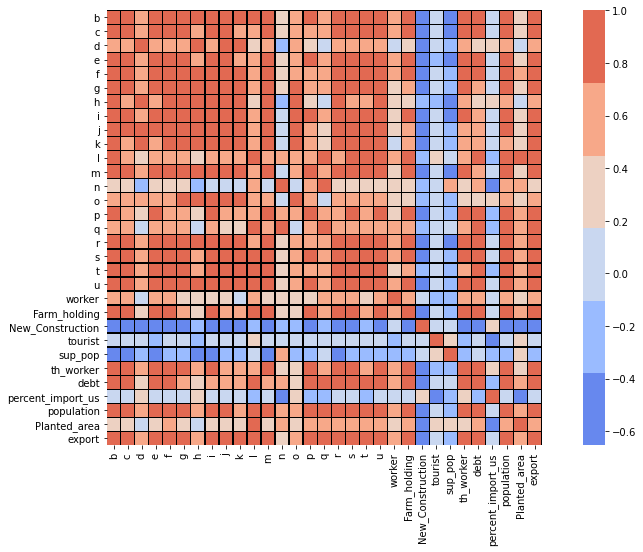

In [137]:
df = dummy_df.copy()
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),
            square=True,
            linewidths=0.25,    
            linecolor=(0,0,0),
            cmap=sns.color_palette("coolwarm"),
            annot=False)

In [138]:
df = df.dropna()
X = df[input_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.04082040704893153, 0.979423926736132]

In [139]:
df.shape

(24, 31)

In [140]:
df.drop([ 's','t','u','r','j','f','g','i','m','export','population','e'
       ], 1, inplace=True)
df.shape

(24, 19)

In [141]:
updated_vars = list(input_vars)
#updated_vars.remove('c')
#updated_vars.remove('d')
updated_vars.remove('e')
updated_vars.remove('f')
updated_vars.remove('g')
updated_vars.remove('i')
updated_vars.remove('j')
# updated_vars.remove('k')
# updated_vars.remove('l')
updated_vars.remove('m')
# updated_vars.remove('n')
# updated_vars.remove('o')
# updated_vars.remove('p')
# updated_vars.remove('q')
updated_vars.remove('r')
updated_vars.remove('s')
updated_vars.remove('t')
updated_vars.remove('u')
#updated_vars.remove('JURISTIC_PERSON ')
# # updated_vars.remove('Tourism')
#updated_vars.remove('Life_Insurance')
#updated_vars.remove('Farm_holding')
#updated_vars.remove('Births')
#updated_vars.remove('Population')
# updated_vars.remove('th_worker')
# updated_vars.remove('debt')
updated_vars.remove('population')
#updated_vars.remove('Planted_area')
updated_vars.remove('export')
len(updated_vars )

18

In [142]:
df = df.dropna()
X = df[updated_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.08587193818177781, 0.9089436230582819]

In [143]:
updated_vars

['c',
 'd',
 'h',
 'k',
 'l',
 'n',
 'o',
 'p',
 'q',
 'worker',
 'Farm_holding',
 'New_Construction',
 'tourist',
 'sup_pop',
 'th_worker',
 'debt',
 'percent_import_us',
 'Planted_area']

In [149]:
x1 = df['c'].to_numpy()
x2 =df['d'].to_numpy()
x3 = df['h'].to_numpy()
x4 =df['k'].to_numpy()
x5 = df['l'].to_numpy()
x6 = df['n'].to_numpy()
x7 =df['o'].to_numpy()
x8 = df['p'].to_numpy()
x9 =df['q'].to_numpy()
x10 = df['worker'].to_numpy()
x11 =df['Farm_holding'].to_numpy()
x12 = df['New_Construction'].to_numpy()
x13 = df['tourist'].to_numpy()
x14 =df['sup_pop'].to_numpy()
x15 = df['th_worker'].to_numpy()
x16 = df['debt'].to_numpy()
x17 =df['percent_import_us'].to_numpy()
x18 = df['Planted_area'].to_numpy()
y = df['b'].to_numpy()


In [150]:
def test(X, a, b, c, d, e, f, g, h, i, j, k, l, m,n,o,p,q,r,s):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13,x14,x15,x16,x17,x18 = X
    return a + b*x1 + c*x2 + d*x3 +e*x4 + f*x5 +g*x6 + h*x7 +i*x8 +j*x9 +k*x10 +l*x11 +m*x12+ n*x13 + o*x14+p*x15+q*x16+r*x17+s*x18


In [151]:
from scipy.optimize import curve_fit 
ydata = y
param, param_cov = curve_fit(test, (x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13,x14,x15,x16,x17,x18), ydata, maxfev=20000) 
param


array([-0.1865318 ,  0.65937226,  0.09774876,  0.11314324,  0.37838944,
       -0.13074805,  0.02538636, -0.20959532,  0.23269963,  0.07958553,
        0.17130729,  0.0708393 ,  0.0635179 ,  0.03015946, -0.03473438,
       -0.11435592, -0.0935658 ,  0.07274318,  0.10789936])

In [152]:
predictions = (param[0] + param[1]*x1+ param[2]*x2+ param[3]*x3+ param[4]*x4+ param[5]*x5 + param[6]*x6+ param[7]*x7+ param[8]*x8+ param[9]*x9+ param[10]*x10 + param[11]*x11+ param[12]*x12+ param[13]*x13+ param[14]*x14+ param[15]*x15 + param[16]*x16+ param[17]*x17+ param[18]*x18)
predictions


array([0.01226468, 0.10494164, 0.09313399, 0.10202064, 0.1046701 ,
       0.10089182, 0.1212876 , 0.11608205, 0.1861769 , 0.27311482,
       0.25149409, 0.33908324, 0.41899372, 0.54713894, 0.58221982,
       0.53515905, 0.68859727, 0.9092099 , 0.88597799, 0.79182471,
       0.88927789, 0.84138338, 0.94171726, 1.00285245])

In [153]:
import math
from sklearn import metrics
metrics.r2_score(y, predictions)

0.9978916270527289

In [154]:
mse = metrics.mean_squared_error(y,predictions)
rmse = math.sqrt(mse)
rmse


0.015347960260437615

# Wrapper Methods

## Forward Feature Selection

In [155]:
df = dummy_df.copy()
df = df.dropna()

In [156]:
from sklearn.feature_selection import f_regression
fstat, pval = f_regression(df[input_vars], df.b)
fstat

array([3.46364244e+02, 1.37684686e+01, 1.83548598e+02, 3.42092007e+02,
       7.30976959e+01, 3.05727351e+01, 2.45966934e+02, 7.16577590e+01,
       3.83181831e+01, 2.60249557e+01, 2.46043790e+02, 1.51012587e+00,
       1.44429003e+01, 3.19756862e+01, 1.46203577e+01, 6.63924413e+02,
       4.16421147e+02, 5.05035498e+01, 3.91222377e+02, 1.07354738e+01,
       5.88968708e+01, 7.57976307e+00, 2.22357857e-01, 4.74358390e+00,
       1.04847060e+02, 4.03060065e+01, 3.14850117e-01, 1.30931396e+02,
       4.91314984e+00, 3.62170514e+02])

In [157]:
pval

array([5.96516218e-15, 1.21845672e-03, 3.73957212e-12, 6.78421374e-15,
       1.92490456e-08, 1.47761469e-05, 1.99778457e-13, 2.28139914e-08,
       3.13444518e-06, 4.12213334e-05, 1.99146926e-13, 2.32102993e-01,
       9.80179015e-04, 1.09705987e-05, 9.26332681e-04, 6.30793097e-18,
       8.74714616e-16, 3.97586094e-07, 1.67992709e-15, 3.44890871e-03,
       1.16837088e-07, 1.16039839e-02, 6.41892147e-01, 4.04087167e-02,
       7.83426155e-10, 2.17663515e-06, 5.80390128e-01, 9.85631093e-11,
       3.72998002e-02, 3.75312410e-15])

In [158]:
f_value_threshold = 200  # can adjust this value 
updated_vars = []
for i in range(0,len(input_vars)-1):
    if fstat[i] >= f_value_threshold:
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['c', 'f', 'i', 'm', 'r', 's', 'u']

In [78]:
X = df[updated_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.04802735300507178, 0.9715170387908586]

In [160]:
len(updated_vars)

7

In [161]:
x1 = df['c'].to_numpy()
x2 =df['f'].to_numpy()
x3 = df['i'].to_numpy()
x4 =df['m'].to_numpy()
x5 = df['r'].to_numpy()
x6 = df['s'].to_numpy()
x7 =df['u'].to_numpy()

y = df['b'].to_numpy()


In [162]:
def test(X, a, b, c, d, e, f, g, h):
    x1, x2, x3, x4, x5, x6, x7 = X
    return a + b*x1 + c*x2 + d*x3 +e*x4 + f*x5 +g*x6 + h*x7



In [163]:
from scipy.optimize import curve_fit 
ydata = y
param, param_cov = curve_fit(test, (x1, x2, x3, x4, x5, x6, x7), ydata, maxfev=20000) 
param


array([-0.01724523,  0.43414354, -0.04954671,  0.11471067,  0.18928999,
        0.18997671,  0.4224833 , -0.17442338])

In [164]:
predictions = (param[0] + param[1]*x1+ param[2]*x2+ param[3]*x3+ param[4]*x4+ param[5]*x5 + param[6]*x6+ param[7]*x7)
predictions


array([0.00180394, 0.07842093, 0.08671817, 0.13304044, 0.10577152,
       0.09091348, 0.11212609, 0.15784313, 0.20190953, 0.26297775,
       0.26393803, 0.35361251, 0.39988626, 0.56993502, 0.56025807,
       0.51655695, 0.64205843, 0.88023007, 0.87744889, 0.87557137,
       0.86165245, 0.85453419, 0.93627515, 1.01603168])

In [165]:
import math
from sklearn import metrics
metrics.r2_score(y, predictions)

0.9949798943956306

In [166]:
mse = metrics.mean_squared_error(y,predictions)
rmse = math.sqrt(mse)
rmse


0.02368281786841905

## Recursive Feature Elimination

In [167]:
df = dummy_df.copy()
df = df.dropna()

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = df[input_vars]
y = df['b']
n_features = 7  # define by yourself to select important features

rfe = RFE(LinearRegression(), n_features)
model = rfe.fit(X, y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [169]:
model.ranking_

array([ 1,  2,  1,  1, 15,  1,  6,  1,  1,  3, 12,  9, 10, 19,  7, 17, 23,
        4, 13, 21, 24, 20, 22, 11, 18, 14,  5,  8, 16,  1])

In [170]:
model.estimator_.coef_

array([0.45111659, 0.20114162, 0.0822119 , 0.09167962, 0.06526249,
       0.09883048, 0.16789081])

In [171]:
updated_vars = []
for i in range(0,len(input_vars)-1):
    if model.ranking_[i] == 1:
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['c', 'e', 'f', 'h', 'j', 'k']

In [172]:
X = df[updated_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.019739539217170733, 0.9951884848587148]

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = df[input_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
n_features = 7  # define by yourself to select important features

rfe = RFE(LinearRegression(), n_features)
model = rfe.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([0.86675306, 0.86000041, 0.10287417, 0.38360269, 0.53045745,
       0.14480871, 0.43145852, 0.6320365 ])

In [178]:
len(updated_vars)

6

In [179]:
x1 = df['c'].to_numpy()
x2 =df['e'].to_numpy()
x3 = df['f'].to_numpy()
x4 =df['h'].to_numpy()
x5 = df['j'].to_numpy()
x6 = df['k'].to_numpy()

y = df['b'].to_numpy()


In [180]:
def test(X, a, b, c, d, e, f, g):
    x1, x2, x3, x4, x5, x6 = X
    return a + b*x1 + c*x2 + d*x3 +e*x4 + f*x5 +g*x6


In [181]:
from scipy.optimize import curve_fit 
ydata = y
param, param_cov = curve_fit(test, (x1, x2, x3, x4, x5, x6), ydata, maxfev=20000) 
param


array([0.00073729, 0.5161164 , 0.26679871, 0.12454433, 0.03393775,
       0.06672377, 0.16063691])

In [182]:
predictions = (param[0] + param[1]*x1+ param[2]*x2+ param[3]*x3+ param[4]*x4+ param[5]*x5 + param[6]*x6)
predictions


array([0.01589916, 0.08652395, 0.08908299, 0.14547305, 0.10631881,
       0.1018368 , 0.1068374 , 0.12370679, 0.21507405, 0.24688043,
       0.25166594, 0.33184357, 0.39065076, 0.53035883, 0.57578391,
       0.52885849, 0.71532538, 0.90140462, 0.87946801, 0.842745  ,
       0.85447653, 0.85400289, 0.93477143, 1.01052576])

In [183]:
import math
from sklearn import metrics
metrics.r2_score(y, predictions)


0.9986065864326448

In [184]:
mse = metrics.mean_squared_error(y,predictions)
rmse = math.sqrt(mse)
rmse

0.012477195097421989

# Embedded Methods

## Regression & Lasso (L1)

In [185]:
df = dummy_df.copy()
df = df.dropna()
X = df[input_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [186]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.04082040704893153, 0.979423926736132]

In [187]:
from sklearn.linear_model import Lasso

## Perform regresssion with embedded lasso 
## set alpha (weight of penalty term) = 1

lasso = Lasso(alpha=0.001)
model = lasso.fit(X_train, y_train)
y_pred = model.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.04704561975983354, 0.972669585161193]

In [188]:
[model.coef_, model.intercept_]

[array([ 0.32076503,  0.        ,  0.        ,  0.        ,  0.        ,
         0.05098114,  0.2599026 ,  0.        ,  0.        ,  0.02279601,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.27036848,  0.        ,  0.        ,  0.06502992,  0.        ,
         0.06930756, -0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.        ,  0.02056941]),
 0.0008656279499310027]

In [189]:
index = np.argsort(model.coef_)
coef = [model.coef_[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
update_vars = [input_vars[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
coef

[0.020569406728926622,
 0.02279601118602529,
 0.05098113618708205,
 0.06502991958184694,
 0.06930756222540646,
 0.2599025999215382,
 0.2703684761218855,
 0.320765031165934]

In [190]:
update_vars

['export', 'l', 'h', 'u', 'Farm_holding', 'i', 'r', 'c']

In [191]:
len(update_vars)

8

In [192]:
lasso2 = Lasso(alpha=0.01)
model2 = lasso2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred2)]

[0.04704561975983354, 0.940789192373125]

In [193]:
[model2.coef_, model2.intercept_]

[array([ 0.16372337,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.09193405,  0.        ,  0.        ,  0.        ,  0.        ,
         0.35809116,  0.        ,  0.        ,  0.20602187,  0.        ,
         0.11287089, -0.        , -0.        , -0.        ,  0.00225101,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
 0.04855920093592758]

In [194]:
index = np.argsort(model2.coef_)
coef2 = [model2.coef_[index[i]] for i in range(len(model2.coef_))  if model2.coef_[index[i]] != 0]
update_vars2 = [input_vars[index[i]] for i in range(len(model2.coef_))  if model2.coef_[index[i]] != 0]
coef2

[0.002251007419061302,
 0.09193404710286678,
 0.11287089016291817,
 0.1637233720945274,
 0.20602186900300215,
 0.35809116340449354]

In [195]:
update_vars2

['th_worker', 'm', 'Farm_holding', 'c', 'u', 'r']

In [196]:
len(update_vars2)

6

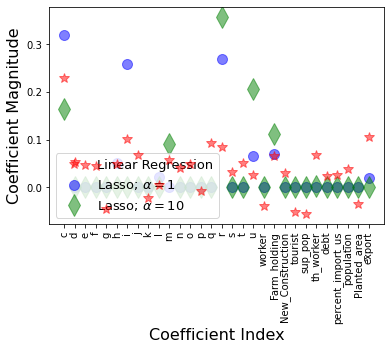

In [197]:
plt.plot(input_vars,lm.coef_,alpha=0.5,linestyle='none',marker='*',markersize=10,color='red',label=r'Linear Regression',zorder=7) # zorder for ordering the markers
plt.plot(input_vars,model.coef_,alpha=0.5,linestyle='none',marker='o',markersize=10,color='blue',label=r'Lasso; $\alpha = 1$') # alpha here is for transparency
plt.plot(input_vars,model2.coef_,alpha=0.5,linestyle='none',marker='d',markersize=15,color='green',label=r'Lasso; $\alpha = 10$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='lower left')
plt.xticks(input_vars, input_vars, rotation='vertical')
plt.show()

In [198]:
x1 = df['th_worker'].to_numpy()
x2 =df['m'].to_numpy()
x3 = df['Farm_holding'].to_numpy()
x4 =df['c'].to_numpy()
x5 = df['u'].to_numpy()
x6 = df['r'].to_numpy()

y = df['b'].to_numpy()


In [199]:
def test(X, a, b, c, d, e, f, g):
    x1, x2, x3, x4, x5, x6 = X
    return a + b*x1 + c*x2 + d*x3 +e*x4 + f*x5 +g*x6


In [200]:
from scipy.optimize import curve_fit 
ydata = y
param, param_cov = curve_fit(test, (x1, x2, x3, x4, x5, x6), ydata, maxfev=20000) 
param



array([0.01020941, 0.06088785, 0.32033508, 0.0298822 , 0.37879054,
       0.05732589, 0.20211176])

In [201]:
predictions = (param[0] + param[1]*x1+ param[2]*x2+ param[3]*x3+ param[4]*x4+ param[5]*x5 + param[6]*x6)
predictions


array([0.04347876, 0.09779105, 0.10783238, 0.13576016, 0.08546836,
       0.07541192, 0.12467577, 0.12723769, 0.17952914, 0.21929802,
       0.24589826, 0.37542434, 0.4414962 , 0.56057153, 0.56508622,
       0.51501718, 0.63049347, 0.87977371, 0.90143215, 0.90615206,
       0.88586554, 0.86468727, 0.91506202, 0.95607077])

In [202]:
import math
from sklearn import metrics
metrics.r2_score(y, predictions)


0.9901958986223395

In [203]:
mse = metrics.mean_squared_error(y,predictions)
rmse = math.sqrt(mse)
rmse


0.03309640673644083

## Regression & Ridge (L2)

In [105]:
from sklearn.linear_model import Ridge

## Perform regresssion with ridge 
## set alpha (weight of penalty term) = 1

X = df[input_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

ridge = Ridge(alpha=0.05)
model = ridge.fit(X_train, y_train)
y_pred = model.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.04398698461099626, 0.9761077957873485]

In [106]:
[model.coef_, model.intercept_]

[array([ 0.1909639 ,  0.04347646,  0.04930745,  0.04531139, -0.01170136,
         0.05716769,  0.08155515,  0.05845168, -0.00907175,  0.00529329,
         0.05461903,  0.03333388,  0.02306938,  0.00112781,  0.08830139,
         0.08826984,  0.0351229 ,  0.05096276,  0.03801151, -0.01443762,
         0.06451394,  0.01948823, -0.0420148 , -0.06025665,  0.07139861,
         0.02552142,  0.023058  ,  0.03711687, -0.03739525,  0.09836126]),
 -0.019863932477679147]

In [107]:
index = np.argsort(model.coef_)
coef = [model.coef_[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
update_vars = [input_vars[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
coef

[-0.06025665497379733,
 -0.042014803068801954,
 -0.037395250120185394,
 -0.014437617772443567,
 -0.011701355996556445,
 -0.00907175328938159,
 0.0011278092614944654,
 0.00529328668740868,
 0.019488231131089676,
 0.023058001006267415,
 0.023069384356999408,
 0.02552142260753941,
 0.033333878205239316,
 0.035122899216509976,
 0.03711687095638814,
 0.03801151152376289,
 0.043476455457646175,
 0.04531139036198301,
 0.04930744580315908,
 0.050962755009520765,
 0.0546190316004139,
 0.05716769497263452,
 0.05845168400734799,
 0.06451393832619656,
 0.0713986112857889,
 0.08155514849641078,
 0.08826983651220366,
 0.08830138610050356,
 0.09836125768828101,
 0.19096389960772642]

In [108]:
update_vars

['sup_pop',
 'tourist',
 'Planted_area',
 'worker',
 'g',
 'k',
 'p',
 'l',
 'New_Construction',
 'percent_import_us',
 'o',
 'debt',
 'n',
 's',
 'population',
 'u',
 'd',
 'f',
 'e',
 't',
 'm',
 'h',
 'j',
 'Farm_holding',
 'th_worker',
 'i',
 'r',
 'q',
 'export',
 'c']

In [109]:
len(update_vars)

30

In [110]:
ridge = Ridge(alpha=10)
model2 = ridge.fit(X_train, y_train)
y_pred = model2.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.09648941770323914, 0.8850345862786442]

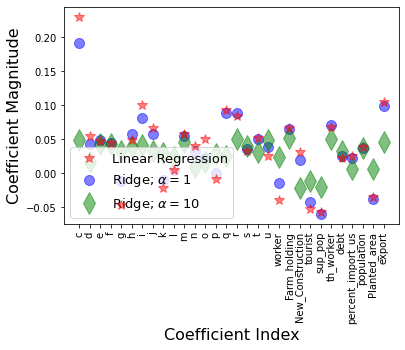

In [111]:
plt.plot(input_vars,lm.coef_,alpha=0.5,linestyle='none',marker='*',markersize=10,color='red',label=r'Linear Regression',zorder=7) # zorder for ordering the markers
plt.plot(input_vars,model.coef_,alpha=0.5,linestyle='none',marker='o',markersize=10,color='blue',label=r'Ridge; $\alpha = 1$') # alpha here is for transparency
plt.plot(input_vars,model2.coef_,alpha=0.5,linestyle='none',marker='d',markersize=15,color='green',label=r'Ridge; $\alpha = 10$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='lower left')
plt.xticks(input_vars, input_vars, rotation='vertical')
plt.show()

## Random Forest

In [112]:
df = dummy_df.copy()
df = df.dropna()

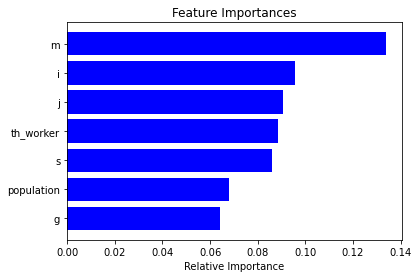

In [113]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10,n_estimators=100)
model.fit(df[input_vars],df.b)

n_features = 7

# Plot feature importance
features = df[input_vars].columns
importances = model.feature_importances_
indices = np.argsort(importances)[-n_features:]  # sort top n features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Choose features with large feature importance

In [114]:
important_features = [features[i] for i in indices]
important_features
updated_vars = []
for i in range(-1,-n_features-1,-1):
    updated_vars.append(important_features[i])
updated_vars

['m', 'i', 'j', 'th_worker', 's', 'population', 'g']

In [115]:
X = df[updated_vars]
y = df['b']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[0.049266547013895295, 0.970028251156486]